# The Birthday Problem

*Authored by Adish Jain*

The Birthday Problem is an interesting problem which looks at how probable it is that at least two people in some group of size N share a birthday.

The problem assumes that:
1. The probability of a person's birthday falling on any day of the year is equally-likely
2. There are no leap years (365 days in a year)
3. Each person's birthday is an independent and identical event


## The Math 

### Complement Rule

So, we are looking for the probability that at least two people share a birthday in some group of size $N$, $P_A$. This is a hard problem. 

What is easier is looking at the complement of such an event:  $P_A = 1 - P_C$, where $P_C$ is the probability that no one shares a birthday. Therefore, if we know $P_C$, we can solve for $P_A$.

$P_C = \frac{365}{365} \times \frac{364}{365}\times \frac{363}{365}...\times \frac{365-N-1}{365}$

Rewriting this product:

$P_C = \prod_{i = 0}^{N-1} \frac{365-i}{365}$

### Log of a Product is a Sum of Logs

$\log(P_C) = \log(\prod_{i = 0}^{N-1} \frac{365-i}{365}) = \sum_{i=0}^{N-1} \log(\frac{365-i}{365}) = \sum_{i=0}^{N-1} \log(1-\frac{i}{365})$

### Maclaurin Series 

The Maclaurin Series tells us an estimate for $e^x$ is $1+x$ for small $x$.

This comes from the fact that $e^x = 1 + \frac{x}{1!} + \frac{x^2}{2!} + ... $ In general, the $k^{th}$ term in this sum will be of the form $\frac{x^k}{k!}$. For small $x$, $x^2$ is already so small that we can estimate the infinite series by the first two terms. 

<img src="approximation.png"style="width: 500px;">

### Putting it Together 

**Fact 1:** $\log(P_C) = \sum_{i=0}^{N-1} \log(1-\frac{i}{365})$  

**Fact 2:** $e^x$ is $1+x$ for small $x$

**Fact 3:** $\sum_{k=1}^{N} k = \frac{N\cdot(N+1)}{2}$

Using **Fact 2**, we're going to rewrite $1-\frac{i}{365} = e^{-\frac{i}{365}}$

We can rewrite **Fact 1** as $\log(P_C) = \sum_{i=0}^{N-1} \log(e^{-\frac{i}{365}}) = \sum_{i=0}^{N-1}-\frac{i}{365} = -\frac{1}{365}\sum_{i=0}^{N-1}i$  

Finally, using **Fact 3** we can rewrite this sum as $-\frac{1}{365}\frac{(N-1)\cdot(N)}{2}$  

So, what we've solved is that $\log(P_C) = -\frac{1}{365}\frac{(N-1)\cdot(N)}{2}$. To retrieve $P_C$ back, we can exponentiate on both sides: 

$P_C = \exp(-\frac{1}{365}\frac{(N-1)\cdot(N)}{2})$

Finally, remember that $P_C$ is just the complement of the actual probability we want, $P_A$. Therefore, undoing the complement rule, we get $P_A = 1 - \exp(-\frac{1}{365}\frac{(N-1)\cdot(N)}{2})$


## The Numbers

So, now we have a function for $P_A$ in terms of $N$. In other words, we can determine the probability that at least two people share a birthday given some group size as our input. 

In [18]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


In [29]:
def calculate_prob(N):
    return 1 - math.exp((-1/365) * (N - 1) * N * (1/2))

probs = []

for i in range(100):
    probs.append(calculate_prob(i))
    
df = pd.DataFrame(list(zip(list(range(100)), probs)), columns =['N', 'Prob']) 

df


,N,Prob
0,0,0.000000
1,1,0.000000
2,2,0.002736
3,3,0.008185
4,4,0.016304
5,5,0.027025
6,6,0.040263
7,7,0.055910
8,8,0.073844
9,9,0.093922


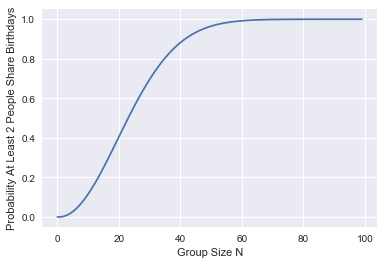

In [30]:
plt.plot(df['N'], df['Prob'])
plt.xlabel("Group Size N")
plt.ylabel("Probability At Least 2 People Share Birthdays");


## A Simulation 

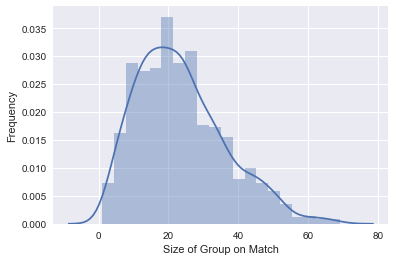

In [25]:
sizes_on_match = []
days = list(range(365))

for i in range(1000): # 1000 simulations
    match = False
    size = 0
    birthdays = []
    while not match: # at the end of this loop, size will be the # people in group when 1st match
        birthday = np.random.choice(days, size=1)
        if birthday not in birthdays:
            # pick a birthday for the newcomer
            birthdays.append(birthday)
            size += 1
        else:
            sizes_on_match.append(size)
            break

sns.distplot(sizes_on_match)
plt.xlabel("Size of Group on Match")
plt.ylabel("Frequency");
